# **Sistemi di Apprendimento Supervisionato**

## **Classificatori e Regressori**

**Alberi decisionali**, metodi ensemble: **random forest**, reti neurali: **multilayer perceptron**

## **Alberi Decisionali**

Gli **alberi decisionali** creano un modello che predice una classe o un valore in output a partire da regole di tipo *binario* inferite dalle *feature* dei dati.

Per far questo, utilizzano una tecnica chiamata **recursive partitioning**: in pratica, l'insieme di test viene suddiviso imponendo delle soglie sulle diverse variabili, le quali saranno modificate fino a che tutti i dati appartenenti ad una certa classe (o con valori simili di regressione) ricadono all'interno di uno stesso sottoinsieme.

Gli alberi decisionali sono facili da interpretare, in quanto rappresentano una serie di *regole binarie*: un esempio è mostrato nella seguente figura.



![albero](Images\dt_vis.png)

Inoltre, non richiedono particolari accortezze in fase di preparazione dei dati, ed hanno una complessità computazionale di tipo **logaritmico** (e quindi abbastanza bassa).

Dall'altro lato, però, sono spesso soggetti ad **overfitting**, ed inoltre non assicurano una predizione continua, ma piuttosto un'*approssimazione lineare a tratti*.

**Scikit Learn** implementa due versioni degli alberi decisionali: la prima è dedicata alla *classificazione*, ed è chiamata `DecisionTreeClassifier()`, mentre la seconda è orientata alla *regressione* ed è chiamata `DecisionTreeRegressor()`.

## **Random Forest**

I **random forest** sono dei **metodi ensemble** basati su *alberi decisionali*. Un metodo ensemble (letteralmente "insieme") permette di combinare i risultati provenienti da diversi algoritmi, ottenendo in generale risultati migliori.

In particolare, il *random forest* sfrutta un insieme di alberi decisionali, ognuno dei quali modellato su un sottoinsieme di dati e feature presenti nel set di training;

i risultati provenienti da ciascuno degli alberi saranno poi *mediati e combinati*. La presenza di queste due componenti di casualità permette di raggiungere un obiettivo ben preciso, ovvero **diminuire l'overfitting** proprio di un singolo albero decisionale, ottenendo un modello generalmente migliore.

Anche per il random forest esistono due versioni, ovvero quella dedicata alla *regressione* `RandomForestRegressor()` e quella dedicata alla *classificazione* `RandomForestClassifier()`.

## **Multilayer Perceptron**

Un **multilayer perceptron** è il più semplice modello di **rete neurale** che è possibile concepire. Nella pratica, è un algoritmo che considera una relazione del tipo:

$$f:\mathbb{R}^m\to\mathbb{R}^o$$

dove $m$ è il numero di input ed $o$ è il numero di dimensioni per l'output.

Ad esempio, se avessimo un insieme di feature $X=x_1,x_2,...x_m$ ed un'output $y$, sia esso una classe o un valore di regressione, il multilayer perceptron apprenderà una funzione $f:\mathbb{R}^m\to\mathbb{R}^1$.

Una rappresentazione del multilayer perceptron è mostrata nella seguente figura.

![mlp](Images\mlp.png)

Nella pratica, il **layer di input** (a sinistra) consiste di un insieme di neuroni, uno per ogni feature. Ogni neurone nello strato nascosto trasforma i valori del layer precedente con una sommatoria pesata $w_1x_1+w_2x_2+...+w_mx_m$ seguita da una funzione di *attivazione non lineare* del tipo $g:\mathbb{R}\to\mathbb{R}$ .

Le funzioni di attivazioni più usate sono state per lungo tempo le **sigmoidali** e le loro varianti. Vedremo in seguito come negli ultimi anni quelle maggiormente gettonate siano diventate le **ReLU**.

Nell'ultimo layer, infine, i valori ricevuti dal layer nascosto sono sommati e combinati nell'output.

Ovviamente, **Scikit Learn** offre due varianti dell'algoritmo, quella per la *classificazione* `MLPClassifier()` e quella per la *regressione* `MLPRegressor()`

## **Esercizi**

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error

### **Es 5.0**

Operiamo sul problema visto nell'[Es 3.0](https://github.com/marcocecca00/PythonCalcoloScientifico/blob/main/Notes/Apprendimento%20Supervisionato%20-%20Regressione%20Lineare%20e%20Logistica.ipynb) usando un *albero decisionale*, un *random forest* ed un *multilayer perceptron*.

Compariamo i risultati in termini di precisione, recall ed accuracy.

In [2]:
tips = sns.load_dataset('tips')

# Preparazione del dataset per la regressione
X_reg = tips['total_bill'].values.reshape(-1, 1)
y_reg = tips['tip'].values.reshape(-1, 1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg)

# Preparazione del dataset per la classificazione
X_clf = tips.loc[:, ('total_bill', 'tip', 'size')].values
y_clf = tips.loc[:, ('day')].values
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf)

In [3]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
mlp_clf = MLPClassifier()
# Fit
dt_clf.fit(X_train_clf, y_train_clf)
rf_clf.fit(X_train_clf, y_train_clf)
mlp_clf.fit(X_train_clf, y_train_clf)
# Visualizzazione risultati
print('Precisione')
print('DT {}'.format(round(precision_score(y_test_clf, dt_clf.predict(X_test_clf), average='weighted'), 2)))
print('RF {}'.format(round(precision_score(y_test_clf, rf_clf.predict(X_test_clf), average='weighted'), 2)))
print('MLP {}'.format(round(precision_score(y_test_clf, mlp_clf.predict(X_test_clf), average='weighted'), 2)))

print('Recall')
print('DT {}'.format(round(recall_score(y_test_clf, dt_clf.predict(X_test_clf), average='weighted'), 2)))
print('RF {}'.format(round(recall_score(y_test_clf, rf_clf.predict(X_test_clf), average='weighted'), 2)))
print('MLP {}'.format(round(recall_score(y_test_clf, mlp_clf.predict(X_test_clf), average='weighted'), 2)))

print('Accuratezza')
print('DT {}'.format(round(accuracy_score(y_test_clf, dt_clf.predict(X_test_clf)), 2)))
print('RF {}'.format(round(accuracy_score(y_test_clf, rf_clf.predict(X_test_clf)), 2)))
print('MLP {}'.format(round(accuracy_score(y_test_clf, mlp_clf.predict(X_test_clf)), 2)))

Precisione
DT 0.38
RF 0.44
MLP 0.28
Recall
DT 0.31
RF 0.39
MLP 0.44
Accuratezza
DT 0.31
RF 0.39
MLP 0.44


### **Es 5.1**

Operiamo sul problema visto nell'[Es 2.1](https://github.com/marcocecca00/PythonCalcoloScientifico/blob/main/Notes/Apprendimento%20Supervisionato%20-%20Regressione%20Lineare%20e%20Logistica.ipynb) usando un albero decisionale, un random forest ed un multilayer perceptron.

Compariamo i risultati in termini di errore quadratico medio usando la funzione `mean_squared_error` del package `sklearn.metrics`.

In [4]:
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
mlp_reg = MLPRegressor()
# Fit
dt_reg.fit(X_train_reg, y_train_reg)
rf_reg.fit(X_train_reg, y_train_reg)
mlp_reg.fit(X_train_reg, y_train_reg)
# Visualizzazione risultati
print('MSE')
print('DT {}'.format(round(mean_squared_error(y_test_reg, dt_reg.predict(X_test_reg)), 2)))
print('RF {}'.format(round(mean_squared_error(y_test_reg, rf_reg.predict(X_test_reg)), 2)))
print('MLP {}'.format(round(mean_squared_error(y_test_reg, mlp_reg.predict(X_test_reg)), 2)))

MSE
DT 1.83
RF 1.47
MLP 1.31


### **Es 5.2**

Esploriamo i risultati ottenuti dall'albero decisionale nell'esercizio **Es 5.0**. Per farlo, usiamo il metodo `plot_tree` del package `sklearn.tree`.

[]

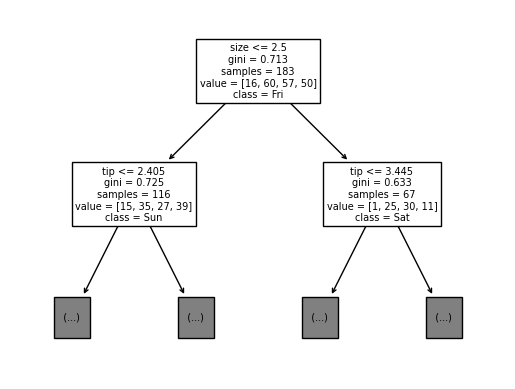

In [5]:
plot_tree(
    dt_clf,
    max_depth=1,
    feature_names=['total_bill', 'tip', 'size'],
    class_names=['Thu', 'Fri', 'Sat', 'Sun'])
plt.plot()

### **Es 5.3**

Proviamo a variare leggermente alcuni parametri per i classificatori ed i regressori usati negli esercizi precedenti. Confrontiamo i risultati ottenuti nei termini delle metriche viste in precedenza.

In [6]:
dt_clf_new = DecisionTreeClassifier(max_depth=2)
rf_clf_new = RandomForestClassifier(n_estimators=150)
mlp_clf_new = MLPClassifier(hidden_layer_sizes=(5, 50))
# Fit
dt_clf_new.fit(X_train_clf, y_train_clf)
rf_clf_new.fit(X_train_clf, y_train_clf)
mlp_clf_new.fit(X_train_clf, y_train_clf)
# Visualizzazione risultati
print('Precisione')
print('DT {}'.format(round(precision_score(y_test_clf, dt_clf_new.predict(X_test_clf), average='macro'), 2)))
print('RF {}'.format(round(precision_score(y_test_clf, rf_clf_new.predict(X_test_clf), average='macro'), 2)))
print('MLP {}'.format(round(precision_score(y_test_clf, mlp_clf_new.predict(X_test_clf), average='macro'), 2)))
print('Recall')
print('DT {}'.format(round(recall_score(y_test_clf, dt_clf_new.predict(X_test_clf), average='macro'), 2)))
print('RF {}'.format(round(recall_score(y_test_clf, rf_clf_new.predict(X_test_clf), average='macro'), 2)))
print('MLP {}'.format(round(recall_score(y_test_clf, mlp_clf_new.predict(X_test_clf), average='macro'), 2)))
print('Accuratezza')
print('DT {}'.format(round(accuracy_score(y_test_clf, dt_clf_new.predict(X_test_clf)), 2)))
print('RF {}'.format(round(accuracy_score(y_test_clf, rf_clf_new.predict(X_test_clf)), 2)))
print('MLP {}'.format(round(accuracy_score(y_test_clf, mlp_clf_new.predict(X_test_clf)), 2)))

Precisione
DT 0.28
RF 0.35
MLP 0.24
Recall
DT 0.29
RF 0.35
MLP 0.25
Accuratezza
DT 0.34
RF 0.43
MLP 0.38
